In [12]:
import pandas as pd
import numpy as np
from collections import Counter
import requests as r
import matplotlib.pyplot as plt
import heapq
%matplotlib inline

In [13]:
url = 'https://gist.githubusercontent.com/ctindall/4588786/raw/d3c331af8a4af0b3a36b3d27afc99042f1733038/us-constitution.txt'

In [14]:
text = r.get(url).text.strip().replace('\n', '')

In [15]:
textDict = dict(Counter(text))

In [16]:
df = pd.DataFrame({'char': list(textDict.keys()), 'char_count': list(textDict.values())})
df['freq'] = df['char_count'] * (1/df.char_count.sum())
df = df.sort_values(by='freq', ascending=True).reset_index(drop=True)
df['rank'] = df.index + 1

In [17]:
df.head(10)

,char,char_count,freq,rank
0,9,1,0.000038,1
1,8,1,0.000038,2
2,0,1,0.000038,3
3,"""",2,0.000076,4
4,K,2,0.000076,5
5,7,2,0.000076,6
6,5,2,0.000076,7
7,6,2,0.000076,8
8,Q,4,0.000152,9
9,4,4,0.000152,10


In [18]:
freqJSON = []
for index, row in df.iterrows():
    freqJSON.append({'char': row['char'], 'freq': row['freq'], 'rank': row['rank']})

In [19]:
df['initial_entropy'] = -1 * df['freq'] * np.log2(df['freq'])
print('Initial Self Entropy: {:.3f} bits'.format(sum(df['initial_entropy'])))

Initial Self Entropy: 4.451 bits


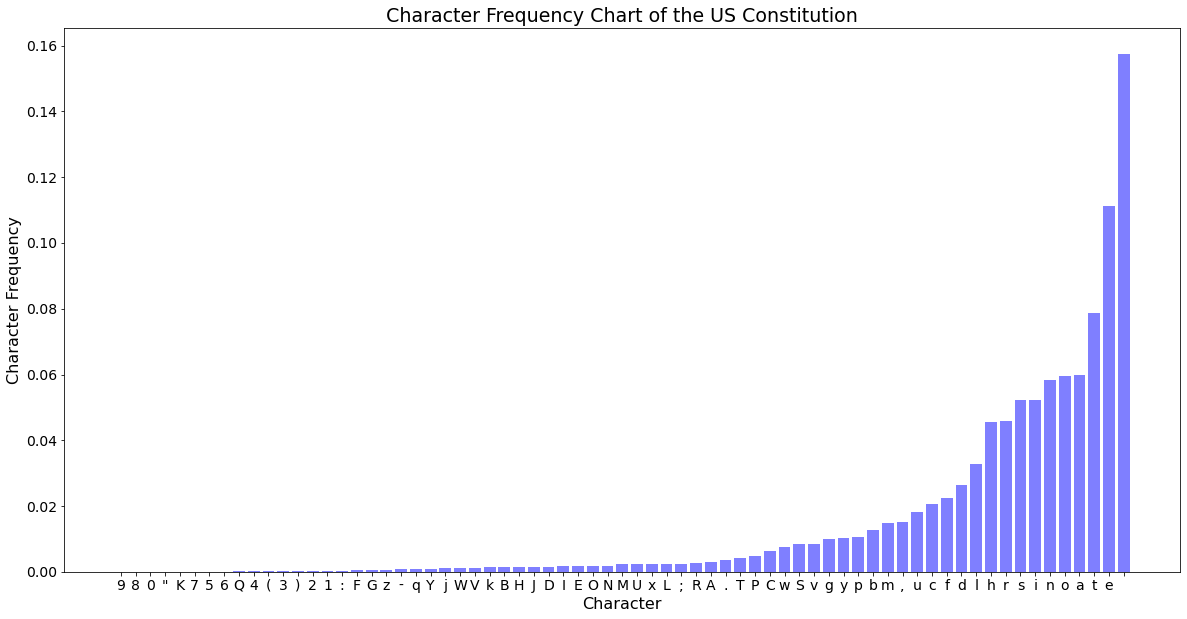

In [20]:
plt.figure(figsize=(20, 10))
plt.bar(df.char, df.freq, color='blue', alpha=0.5)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Character Frequency', fontsize=16)
plt.title('Character Frequency Chart of the US Constitution', fontsize=19)
plt.show()

In [28]:
import heapq
def encode(data):
    key = dict()
    encoded = str()
    corp = dict()
    
    # Count the frequency of characters in data
    for _ in data:
        corp[_]=corp.get(_,0)+1
        # corp.get returns a default value of 0 if key not found
        
    while len(htree)>1:
        left_node = heapq.heappop(htree)
        right_node = heapq.heappop(htree)
    for _ in left[1]:
                # Add a 0 to the encoding of all nodes on the left
                key[_] = '0' + key.get(_,"")
    for _ in right[1]:
                # Add a 1 to the encoding of all nodes on the right
                key[_]= '1' + key.get(_,"")
    # Join both as one node and push to tree
                heapq.heappush(htree(left_node[0]+right_node[0],
                    left_node[1]+right_node[1]))
    for x in key:
        print(x,key[x])
        
        ''' 
        Replace all our characters with their bit encodings and place     them in our string “encoding” 
        '''
    for char in data:
        encoded+=key[char]

    # Here we’re just filling the left over bits with 0's
    rem = len(encoded)%8
    key['rem'] = rem
    encoded+'0'*rem
    return encoded

In [100]:
num = [i for i in range(2, 69)]
num1 = [1]
num2 = []
for i in range(len(num)):
    a = heapq.heappop(num)
    heapq.heappush(num1, a)
    num2.append(num1[-2:])


In [109]:
a = []
b = []
num = [i for i in range(0, 69)]
while len(num) > 1:
    a.append(heapq.heappop(num))
    b.append(heapq.heappop(num))